# Regression From Scratch by Yusuf Abdul 

I created and implemented a linear regression model from scratch. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv('B6data.csv')
df = pd.read_csv('B6data.csv')

In [3]:
# Renaming my dataframes for simplicity.
data.rename(columns={"x": "Year", "y": "Temperature"}, inplace=True)
df.rename(columns={"x": "Year", "y": "Temperature"}, inplace=True)

In [4]:
mean_x = data['Year'].mean()
mean_y = data['Temperature'].mean()

# calculate the values for the slope and y-intercept of the regression line
numerator = 0
denominator = 0
for x, y in zip(data['Year'], data['Temperature']):
    numerator += (x - mean_x) * (y - mean_y)
    denominator += (x - mean_x)**2
m = numerator / denominator
b = mean_y - m * mean_x

# predict the temperature for a given year
predicted_y = m * x + b

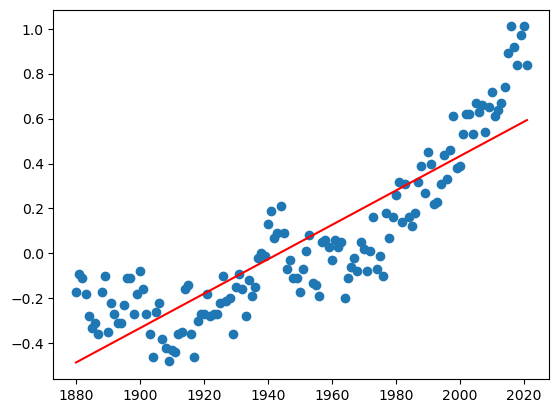

In [5]:
# scatter plot of the data
plt.scatter(data['Year'], data['Temperature'])
# calculating the slope and y-intercept of the regression line
mean_x = data['Year'].mean()
mean_y = data['Temperature'].mean()
numerator = 0
denominator = 0
for x, y in zip(data['Year'], data['Temperature']):
    numerator += (x - mean_x) * (y - mean_y)
    denominator += (x - mean_x)**2
m = numerator / denominator
b = mean_y - m * mean_x

# ploting 
plt.plot(data['Year'], m * data['Year'] + b, color='red')
plt.show()

### Plot for prediction 

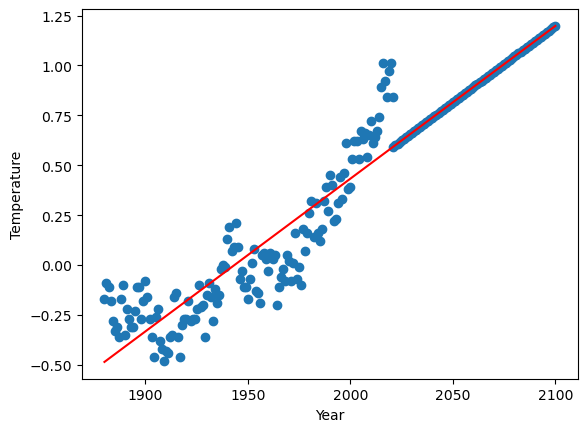

In [7]:
# df for the years from 2021 to 2100
future_years = pd.DataFrame({"Year": range(2021, 2101)})
future_years["Temperature"] = future_years["Year"].apply(lambda x: b0 + (b1 * x))
plot_regression(df.append(future_years), "Year", "Temperature", b0, b1)

# (b)

In [8]:
df["Year^2"] = df["Year"]**2

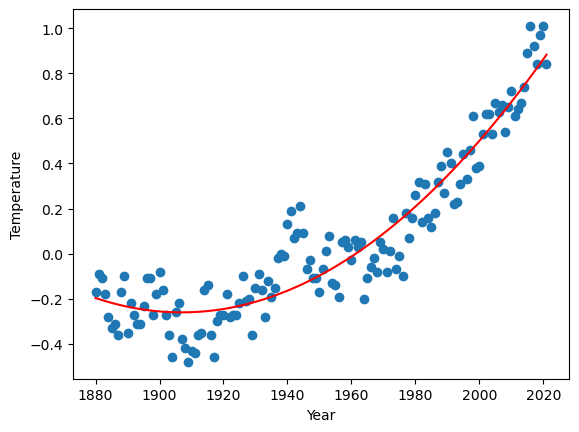

In [9]:
def regression(df, x_cols, y_col):
    X = df[x_cols]
    ones = np.ones(X.shape[0]).reshape(-1, 1)
    X = np.concatenate((ones, X), axis=1)
    xtx_inv = np.linalg.inv(np.dot(X.T, X))
    xtx_inv_xt = np.dot(xtx_inv, X.T)
    b = np.dot(xtx_inv_xt, df[y_col])
    return b

def plot_regression(df, x_cols, y_col, b):
    plt.scatter(df[x_cols[0]], df[y_col])
    x_values = np.linspace(df[x_cols[0]].min(), df[x_cols[0]].max(), 100)
    y_values = b[0] + (b[1] * x_values) + (b[2] * x_values**2)
    plt.plot(x_values, y_values, color="red")
    plt.xlabel(x_cols[0])
    plt.ylabel(y_col)
    plt.show()
    
b = regression(df, ["Year", "Year^2"], "Temperature")
plot_regression(df, ["Year", "Year^2"], "Temperature", b)


### Plot for prediction.

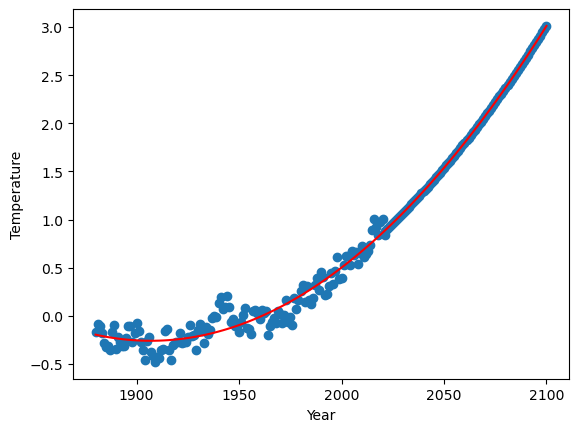

In [10]:
future_years = pd.DataFrame({"Year": range(2021, 2101)})
future_years["Year^2"] = future_years["Year"]**2
future_years["Temperature"] = future_years.apply(lambda x: b[0] + (b[1] * x["Year"]) + (b[2] * x["Year^2"]), axis=1)
plot_regression(df.append(future_years), ["Year", "Year^2"], "Temperature", b)

# (c) 

In [11]:
polynomial_coefficients = np.polyfit(future_years["Year"], future_years["Temperature"], 2)
years_1_5 = np.roots([polynomial_coefficients[0], polynomial_coefficients[1], polynomial_coefficients[2] - 1.5])
years_2 = np.roots([polynomial_coefficients[0], polynomial_coefficients[1], polynomial_coefficients[2] - 2])
print(f"The temperature will reach 1.5℃ in the years {years_1_5[0]:.1f} and {years_1_5[1]:.1f}")
print(f"The temperature will reach 2℃ in the years {years_2[0]:.1f} and {years_2[1]:.1f}")

The temperature will reach 1.5℃ in the years 2048.5 and 1765.3
The temperature will reach 2℃ in the years 2067.4 and 1746.4


# (d)

In [12]:
data = pd.read_csv(r'B6data.csv')
# using only data from 1950-2021..
mask = (data['x'] >= 1950) & (data['x'] <= 2021)

In [13]:
dff = data.loc[mask]
dff = dff.loc[mask, ['x', 'y']]
Yearz = dff['x']
Temperaturez = dff['y']

polynomial_coefficientz = np.polyfit(Yearz, Temperaturez, 2)
Yearz_2100 = list(range(max(Yearz), 2101))
regression_linez = [polynomial_coefficients[0] * x ** 2 + polynomial_coefficients[1] * x + polynomial_coefficients[2] for x in Yearz_2100]

In [14]:
yearz_1_5 = np.roots([polynomial_coefficientz[0], polynomial_coefficientz[1], polynomial_coefficientz[2] - 1.5])
yearz_2 = np.roots([polynomial_coefficientz[0], polynomial_coefficientz[1], polynomial_coefficientz[2] - 2])
print(f"The temperature will reach 1.5℃ in the years {yearz_1_5[0]:.1f} and {yearz_1_5[1]:.1f}")
print(f"The temperature will reach 2℃ in the years {yearz_2[0]:.1f} and {yearz_2[1]:.1f}")

The temperature will reach 1.5℃ in the years 2038.0 and 1849.0
The temperature will reach 2℃ in the years 2051.8 and 1835.2
